In [2]:
from math import sqrt, log
import glob
import re

from utils import Graph
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt
import numpy as np

T = 87       # K
n = 2.11e22  # cm^-3

def mobility(E):
    a0 = 551.6
    a1 = 7953.7
    a2 = 4440.43
    a3 = 4.29
    a4 = 43.63
    a5 = 0.2053
    T0 = 89

    num = a0 + a1*E + a2*E**(3/2) + a3*E**(5/2)
    den = 1 + (a1/a0)*E + a4*E**2 + a5*E**3

    return (num / den) * (T / T0)**(-3/2)

In [6]:
file_tree = [{}, {}]

for i, d in enumerate([1, 3]):
    for file in glob.glob('lar-drift-velocity/%id/*.txt'%d):
        key = int(re.search(r'(\d*)(?:V)', file).group(1))
        if (key in file_tree[i]):
            file_tree[i][key].append(file)
        else:
            file_tree[i][key] = [file]

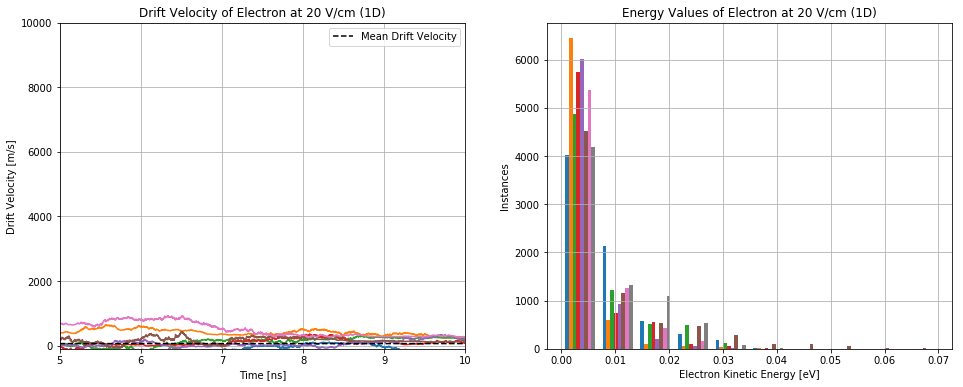

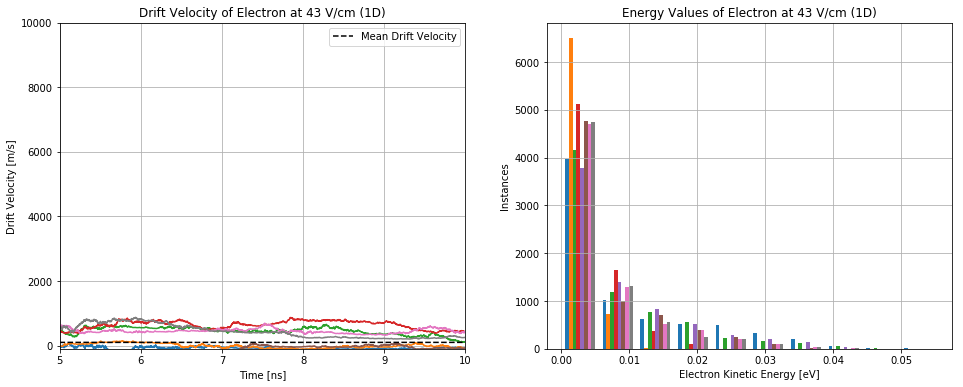

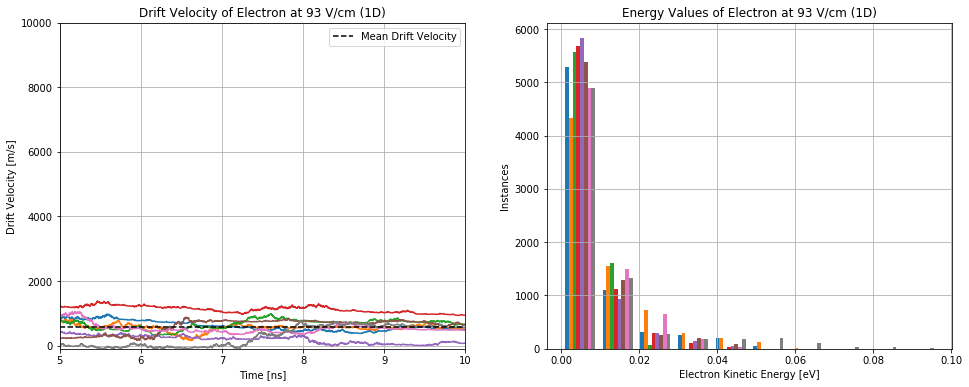

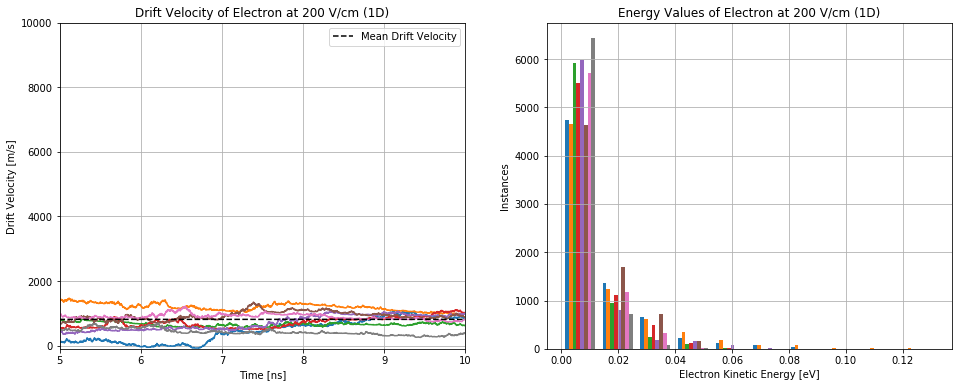

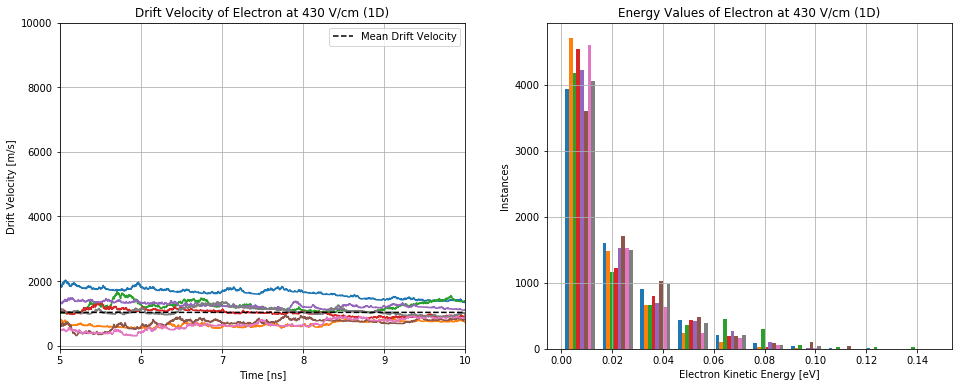

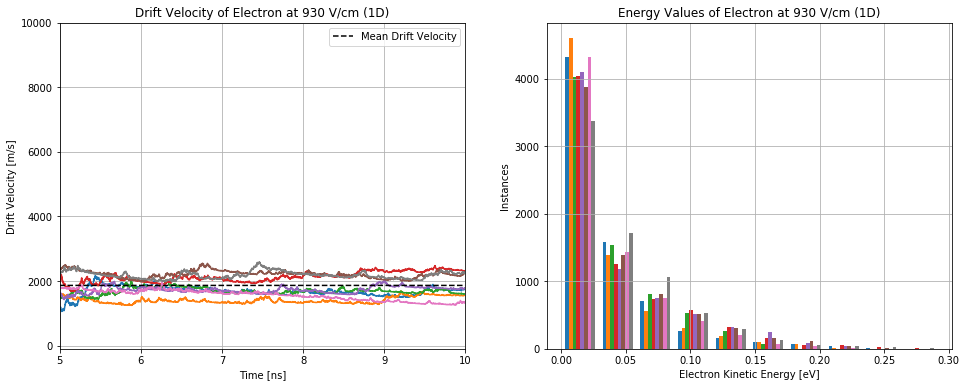

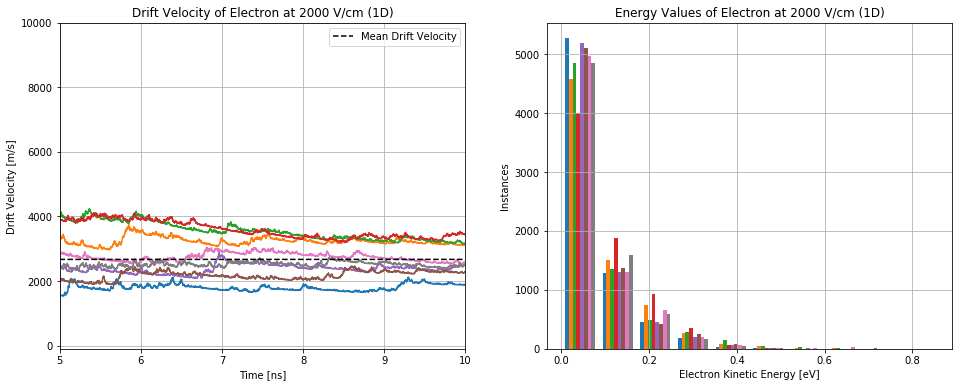

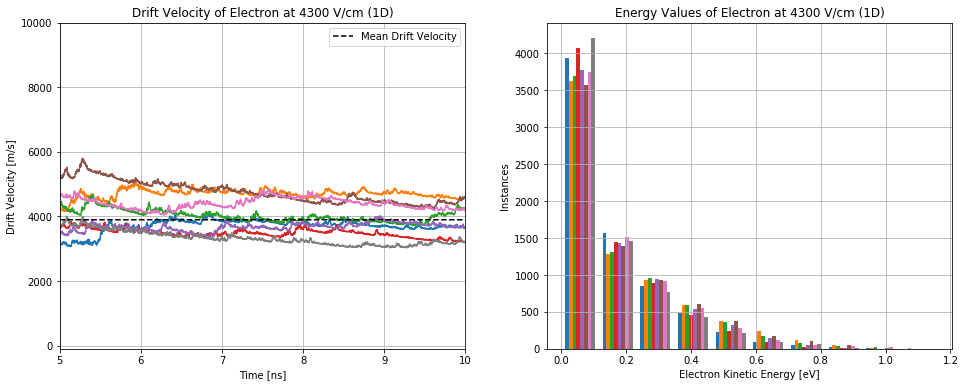

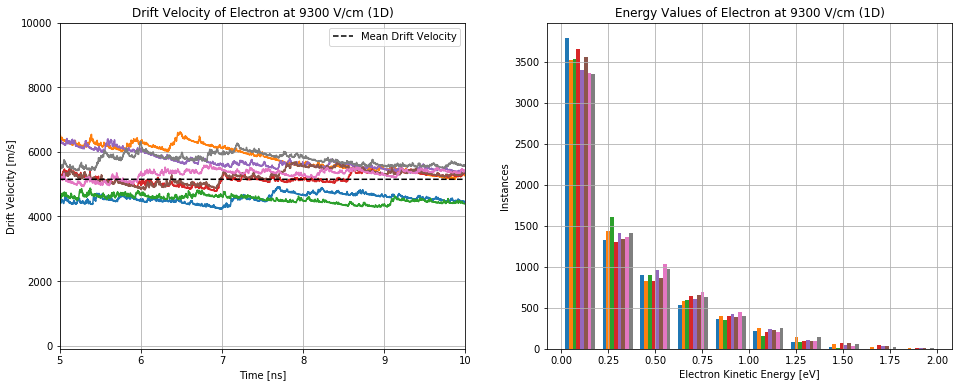

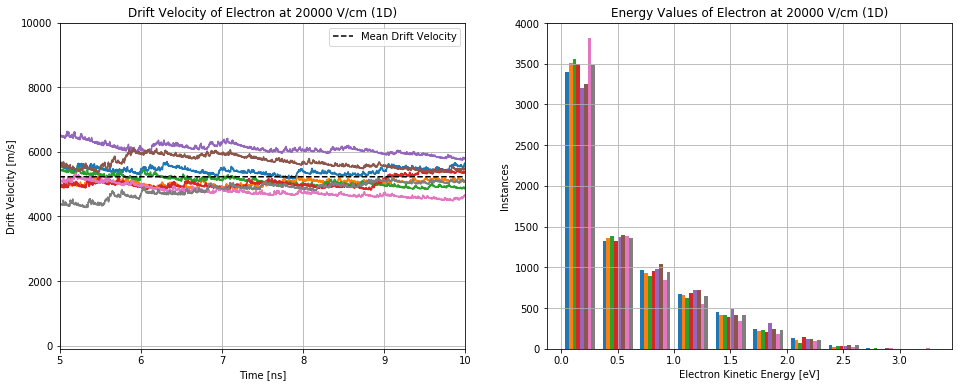

In [8]:
for key, value in sorted(file_tree[0].items()):
    group = Graph(value)
    
    time, vel = group.drift_velocity_plot()
    ke = group.energy_plot()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    ax1.set_title(f'Drift Velocity of Electron at {key} V/cm (1D)')
    ax1.set_xlabel('Time [ns]')
    ax1.set_ylabel('Drift Velocity [m/s]')
    
    for i, t in enumerate(time):
        ax1.plot(t, vel[i])
        
    ax1.plot(time[0], np.full(len(time[0]), group.drift_mean()), 'k--', label='Mean Drift Velocity')
    ax1.set_xlim(5, 10)
    ax1.set_ylim(-100, 10000)
    
    ax1.grid()
    ax1.legend()

    ax2.hist(ke)
    
    ax2.set_title(f'Energy Values of Electron at {key} V/cm (1D)')
    ax2.set_xlabel('Electron Kinetic Energy [eV]')
    ax2.set_ylabel('Instances')
    
    ax2.grid()
    
    plt.show()

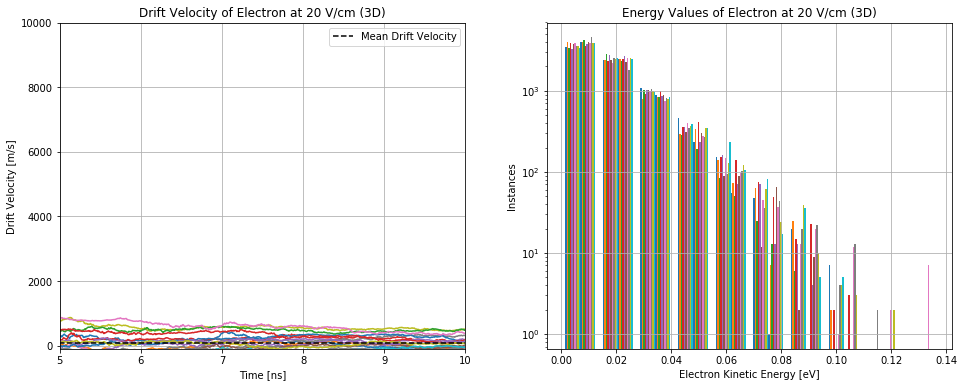

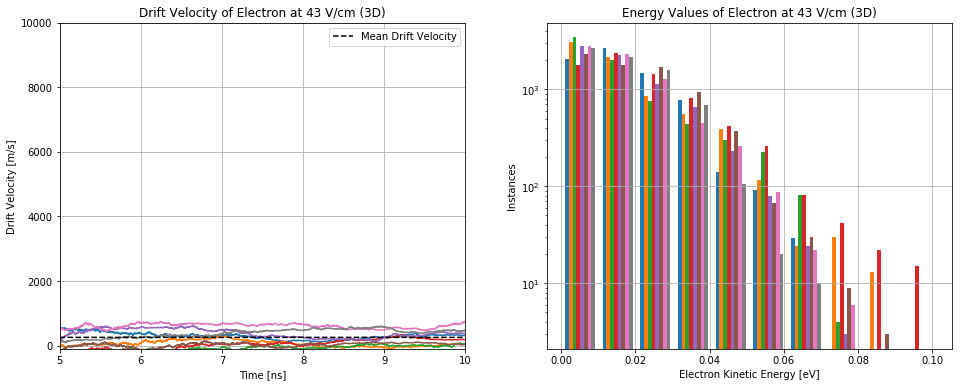

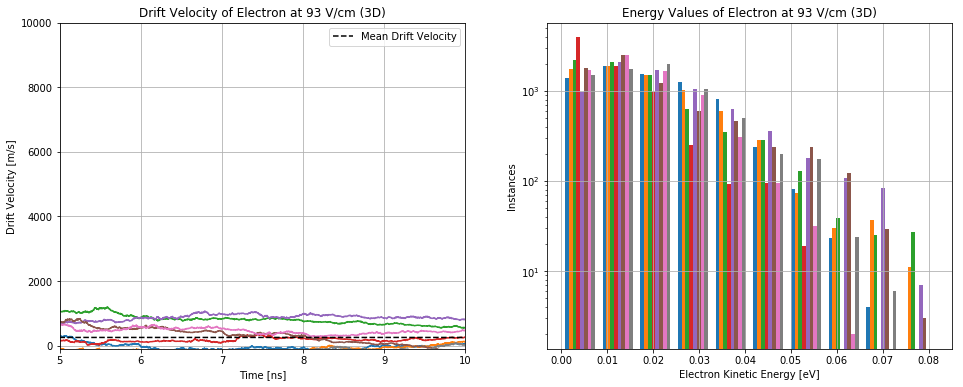

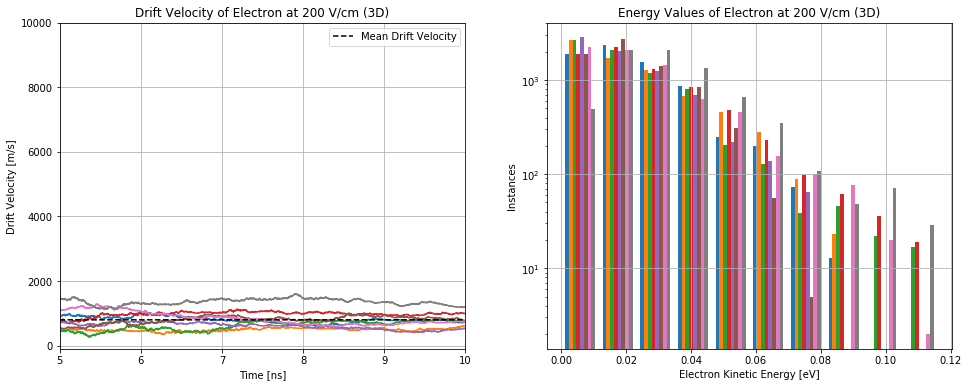

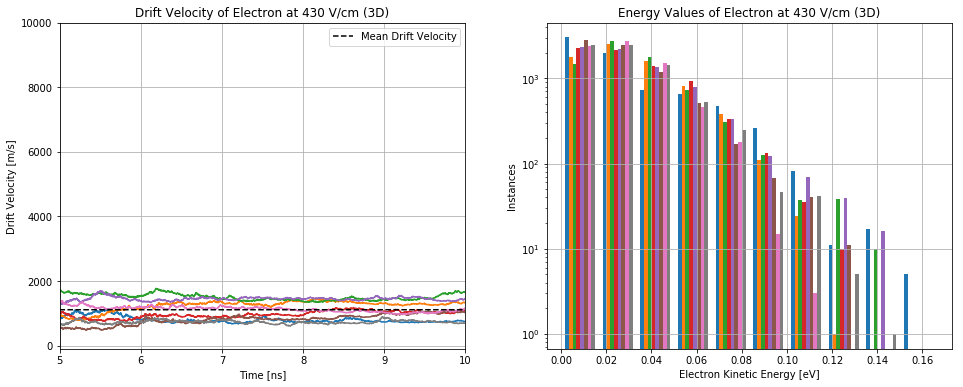

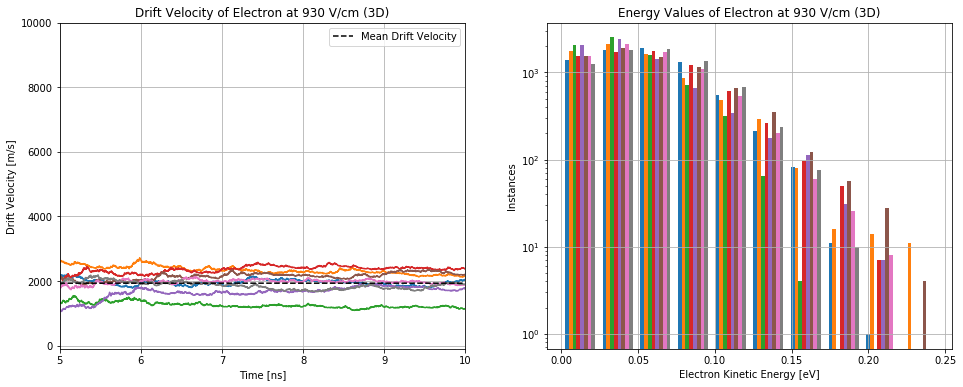

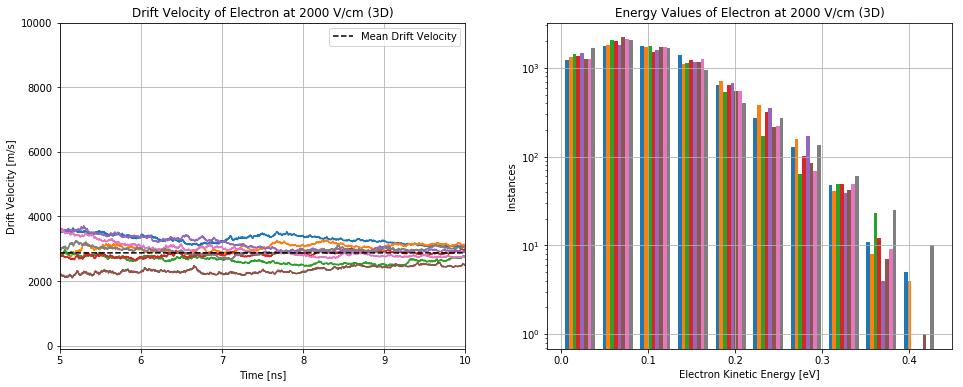

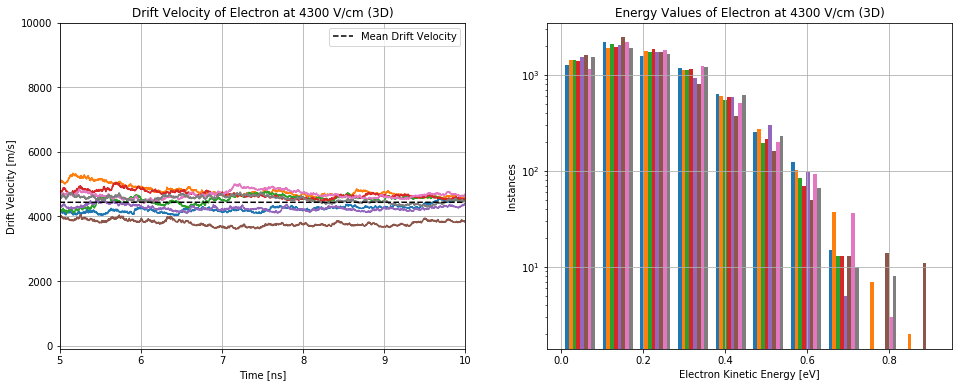

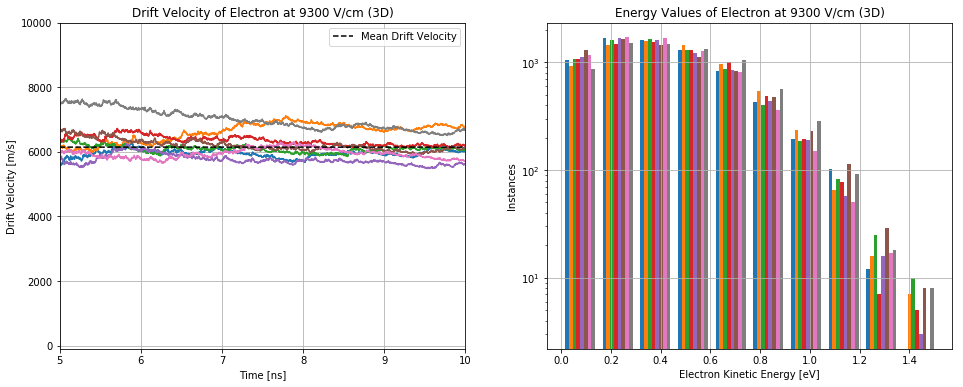

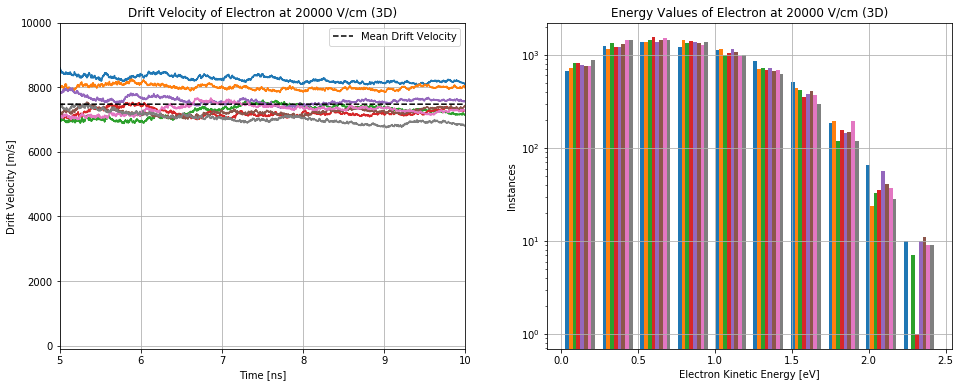

In [9]:
for key, value in sorted(file_tree[1].items()):
    group = Graph(value)
    
    time, vel = group.drift_velocity_plot()
    ke = group.energy_plot()
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
    
    ax1.set_title(f'Drift Velocity of Electron at {key} V/cm (3D)')
    ax1.set_xlabel('Time [ns]')
    ax1.set_ylabel('Drift Velocity [m/s]')
    
    for i, t in enumerate(time):
        ax1.plot(t, vel[i])
        
    ax1.plot(time[0], np.full(len(time[0]), group.drift_mean()), 'k--', label='Mean Drift Velocity')
    ax1.set_xlim(5, 10)
    ax1.set_ylim(-100, 10000)
    
    ax1.grid()
    ax1.legend()

    ax2.hist(ke)
    
    ax2.set_title(f'Energy Values of Electron at {key} V/cm (3D)')
    ax2.set_xlabel('Electron Kinetic Energy [eV]')
    ax2.set_ylabel('Instances')
    
    ax2.set_yscale('log')
    
    ax2.grid()
    
    plt.show()

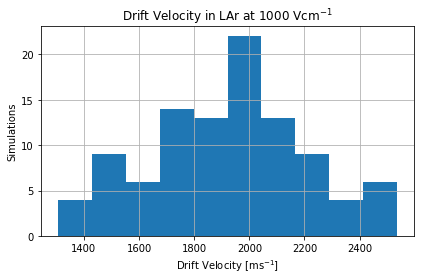

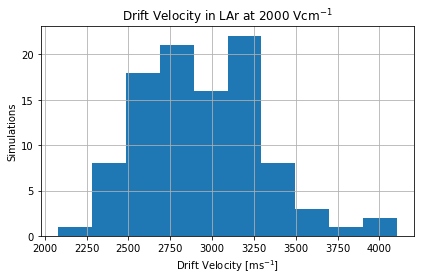

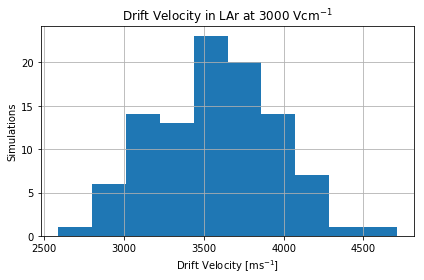

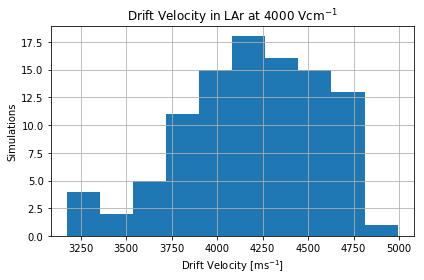

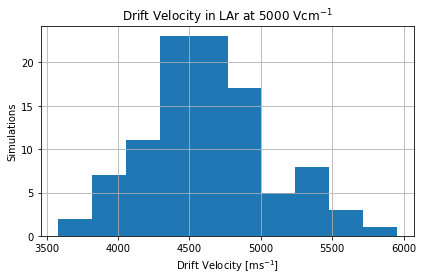

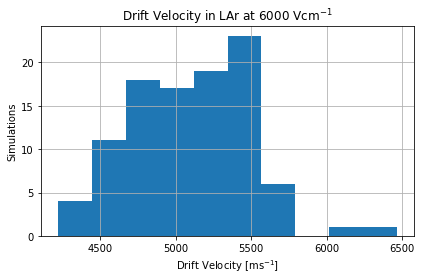

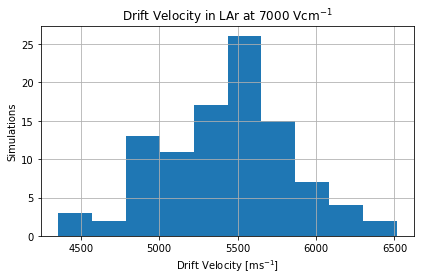

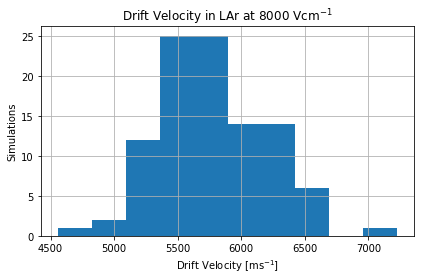

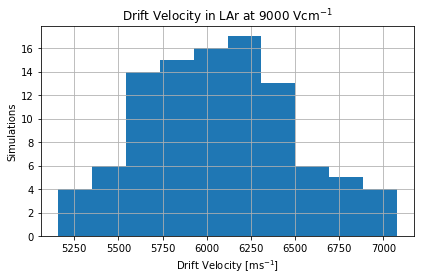

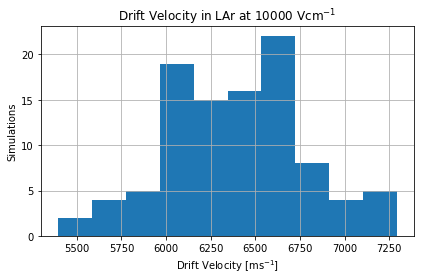

In [10]:
file_tree_diff = [{}, {}]
field_strength = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

for i, d in enumerate([1, 3]):
    for field in field_strength:
        for file in glob.glob(f'lar-diffusion/{d}d/{field}/*.txt'):
            key = int(re.search(r'(\d*)(?:V)', file).group(1))
            if (key in file_tree_diff[i]):
                file_tree_diff[i][key].append(file)
            else:
                file_tree_diff[i][key] = [file]

for key, value in sorted(file_tree_diff[1].items()):
    group = Graph(value)
    
    # plt.rcParams['font.size'] = 14
    # plt.rcParams['font.family'] = 'serif'
    # fig = plt.figure(figsize=(6, 6))
    
    plt.hist([k[-1] for k in group.drift])
    
    plt.xlabel('Drift Velocity [ms$^{-1}$]')
    plt.ylabel('Simulations')
    plt.title(f'Drift Velocity in LAr at {key} Vcm$^{{-1}}$')
    
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    # plt.savefig(f'lar_drift_dist_{key}.pdf', bbox_inches='tight')

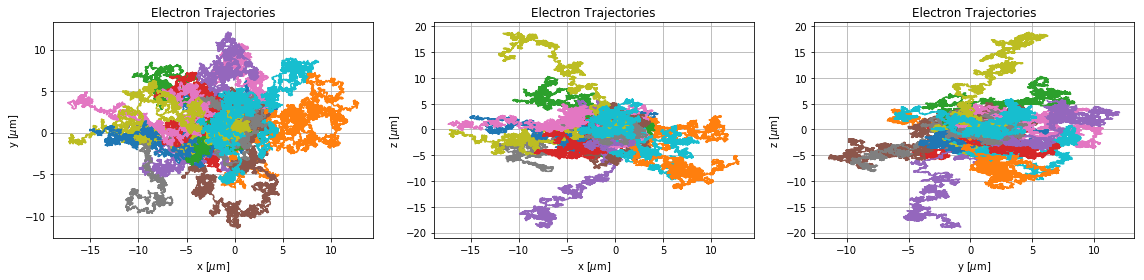

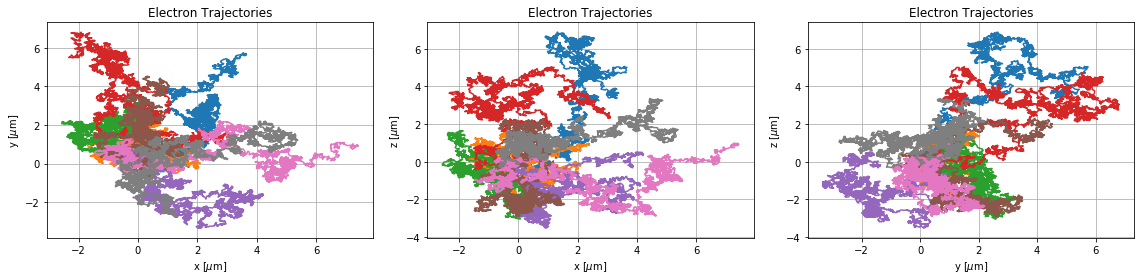

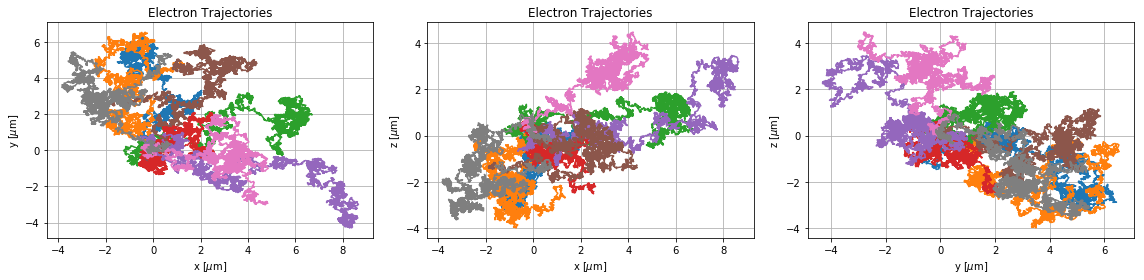

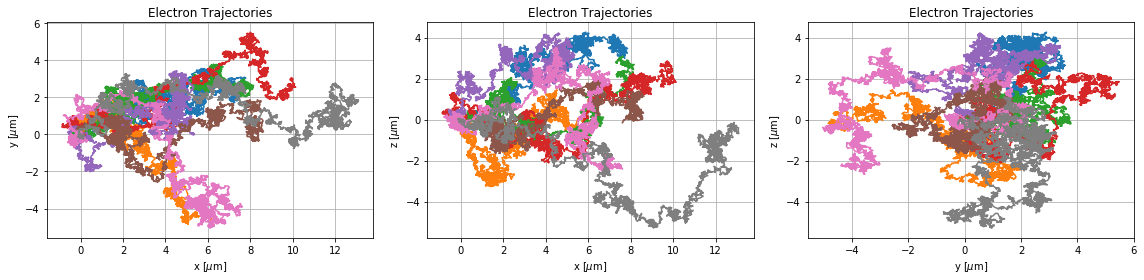

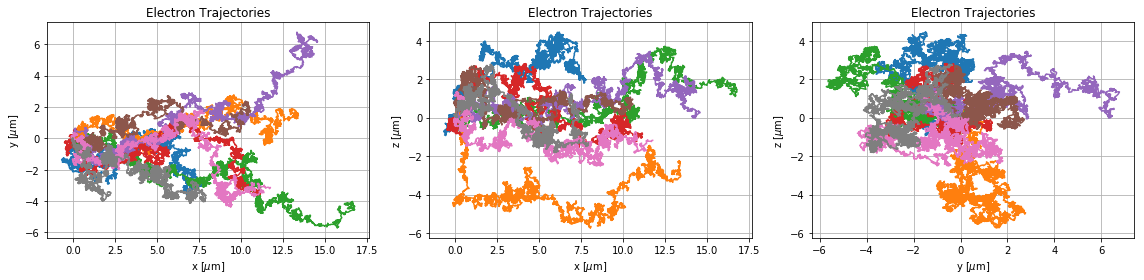

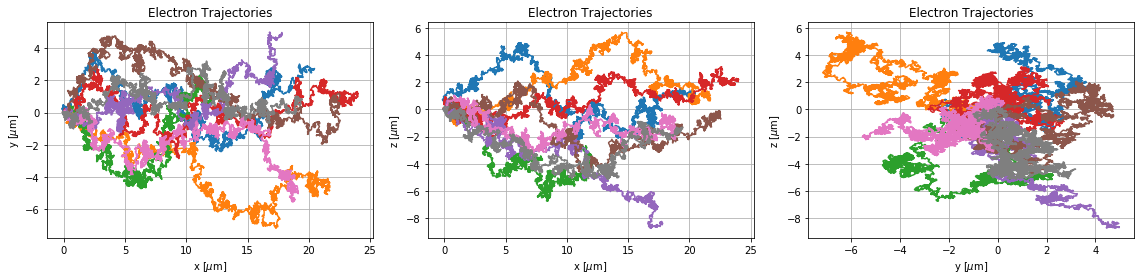

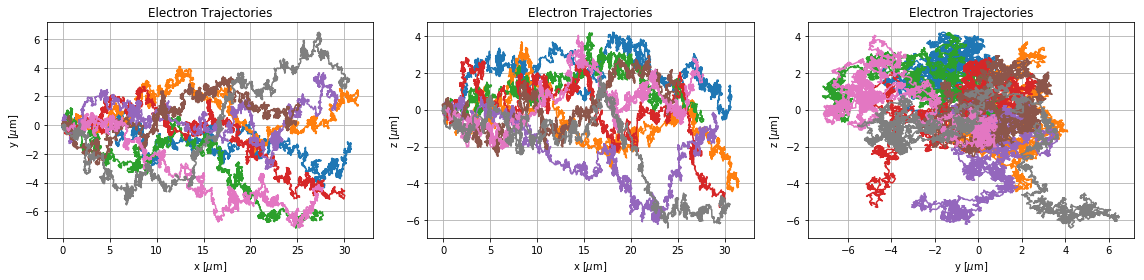

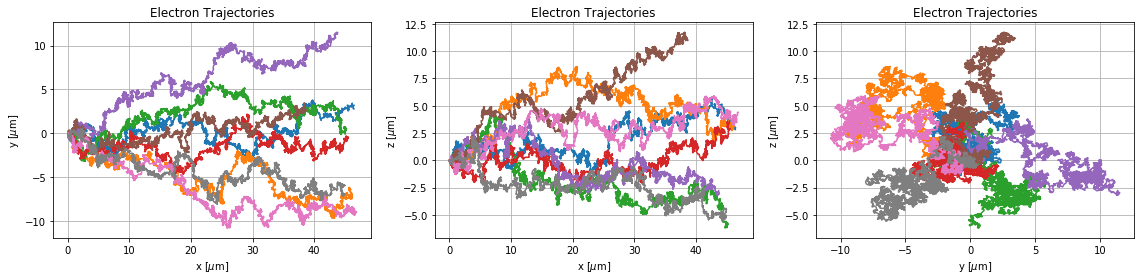

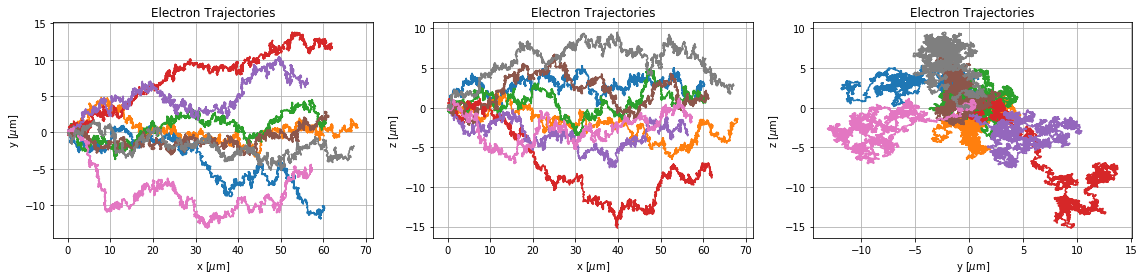

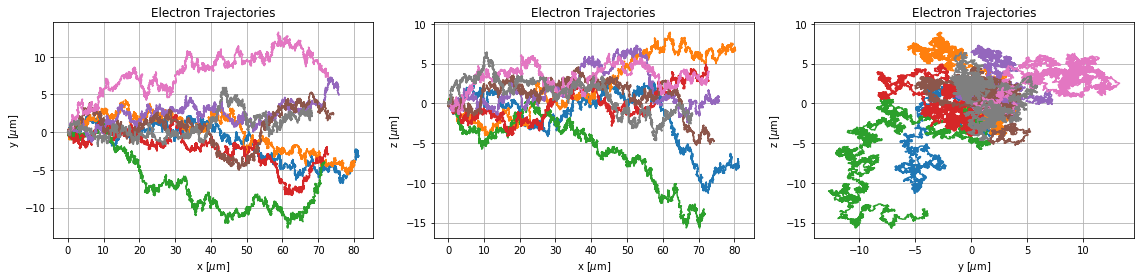

In [11]:
# plt.rcParams['font.size'] = 14
# plt.rcParams['font.family'] = 'serif'

for key, value in sorted(file_tree[1].items()):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
    
    group = Graph(value)
        
    # fig = plt.figure(figsize=(6, 6))
    
    for i in range(group.n):
        x, y = group.x[i], group.y[i]
        ax1.plot(x, y)
        
    ax1.set_xlabel('x [$\mu$m]')
    ax1.set_ylabel('y [$\mu$m]')
    ax1.set_title('Electron Trajectories')
    
    ax1.grid()
    
    # plt.tight_layout()
    # plt.savefig(f'../../../documentation/plots/lar_traj_xy.pdf', bbox_inches='tight')

    # fig = plt.figure(figsize=(6, 6))
    
    for i in range(group.n):
        x, z = group.x[i], group.z[i]
        ax2.plot(x, z)
        
    ax2.set_xlabel('x [$\mu$m]')
    ax2.set_ylabel('z [$\mu$m]')
    ax2.set_title('Electron Trajectories')
    
    ax2.grid()
    
    # plt.tight_layout()
    # plt.savefig(f'../../../documentation/plots/lar_traj_xz.pdf', bbox_inches='tight')

    # fig = plt.figure(figsize=(6, 6))
    
    for i in range(group.n):
        y, z = group.y[i], group.z[i]
        ax3.plot(y, z)
        
    ax3.set_xlabel('y [$\mu$m]')
    ax3.set_ylabel('z [$\mu$m]')
    ax3.set_title('Electron Trajectories')
    ax3.grid()
    
    # plt.tight_layout()
    # plt.savefig(f'../../../documentation/plots/lar_traj_yz.pdf', bbox_inches='tight')

    plt.tight_layout()
    plt.show()

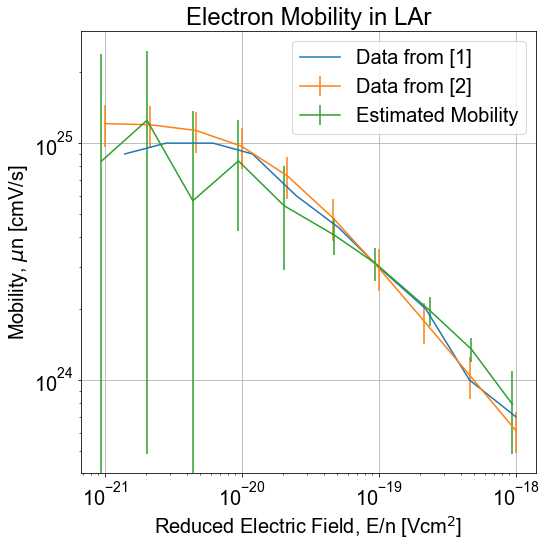

In [9]:
# plt.rcParams['font.size'] = 20
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = ['Arial']
# fig = plt.figure(figsize=(8, 8))

volts = [[], []]
means = [[], []]
std_devs = [[], []]

# plt.rcParams['font.size'] = 14
# plt.rcParams['font.family'] = 'serif'
# fig = plt.figure(figsize=(12, 6))

# From https://lar.bnl.gov/properties/trans.html
c = np.logspace(-21, -18, 10)
d = mobility(c * n * 1e-3) * n

# From https://doi.org/10.1088/0022-3727/19/12/011
a = [1.4e-21, 2.8e-21, 6.2e-21, 1.2e-20, 2.5e-20, 5.1e-20, 1e-19, 2.2e-19, 4.6e-19, 1e-18]
b = [9e24, 10e24, 10e24, 9e24, 6e24, 4.4e24, 3e24, 2e24, 1e24, 7e23]

plt.plot(a, b, label='Data from [1]')
plt.errorbar(c, d, yerr=(0.2 * d), label='Data from [2]')

for i, dim in enumerate([1, 3]):
    for key, value in sorted(file_tree[i].items()):
        graph = Graph(value)
        volts[i].append(key)
        means[i].append(graph.drift_mean())
        std_devs[i].append(graph.drift_std_dev())

    x, y, err = [], [], []
        
    for j, mu in enumerate(means[i]):
        x.append(float(volts[i][j]) / n)
        y.append(means[i][j] * (n / float(volts[i][j])) * 1e2)
        err.append(std_devs[i][j] * (n / float(volts[i][j])) * 1e2)

    if dim == 3: # Bypass 1D to produce a plot for the poster
        plt.errorbar(x, y, yerr=err, label=f'Estimated Mobility')

plt.xlabel('Reduced Electric Field, E/n [Vcm$^2$]')
plt.ylabel('Mobility, $\mu$n [cmV/s]')
plt.title('Electron Mobility in LAr')

plt.xscale('log')
plt.yscale('log')

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# plt.savefig(f'lar_mobility.pdf', bbox_inches='tight')